# **Séance 2 — Simulation numérique du mouvement orbital d’une planète**

Aujourd'hui, on estime que notre galaxie contient en moyenne au **moins une planète par système stellaire**. Il n'y a donc aucune raison pour que votre étoile reste toute seule, et vous allez y **ajouter une planète** ! L'objectif de cette deuxième séance sera de modéliser la **trajectoire orbitale** d'une planète autour de votre étoile précédemment définie. A l'aide des **lois de la gravitation de Newton**, vous allez calculer la **vitesse orbitale** de votre planète, puis résoudre son **équation du mouvement** autour de votre étoile.

---

## **Objectifs pédagogiques**

Dans cette séance, vous allez :
- Manipuler les dictionnaires (**`dict`**).
- Appliquer la **loi de la gravitation universelle** de Newton pour modéliser le mouvement d’une planète autour d’une étoile.
- Utiliser la méthode **d’intégration numérique (`odeint`)** pour résoudre les équations différentielles du mouvement.
- Visualiser l’**orbite planétaire** (circulaire ou elliptique) en 2D.

---

## **Exercice 0.1 - Import des librairies**

Importez les librairies nécessaires pour effectuer vos opérations et visualisations.

**Astuce :** Souvent, durant le développement d'un code, il est nécessaire d'importer de nouvelles librairies auxquelles on n'a pas pensé au préalable. Il ne faut donc pas hésiter à revenir au début du code pour les ajouter, afin de centraliser tous les imports pour une lecture plus facile du code.


In [2]:
# Import des librairies

import numpy as np
import astropy.constants as const
import matplotlib.pyplot as plt
import scipy as sp

## **Exercice 0.2 - Utilisation de dictionnaires**

Les **dictionnaires** en python sont des objets qui peuvent contenir n'importe quel type d'**objet** associé à des **mot-clef**. Ainsi un dictionnaire peut être initialisé à l'aide d'accolades `{}` comme ci-dessous :

```python

dictionnaire = {"valeur_0":0,
                "valeur_1":50,
                "list":[0, 1, 2, 3, 5],
                "array":np.array([0]),
                "string":"coucou",
                }

print(dictionnaire["list"])

```

**1. Copiez-collez le dictionnaire ci-dessus, et affichez le contenu de chaque clé ("valeur_0", "valeur_1", "list"...)** 


In [3]:
# Création du dictionnaire

dictionnaire = {"valeur_0":0,
                "valeur_1":50,
                "list":[0, 1, 2, 3, 5],
                "array":np.array([0]),
                "string":"coucou",
                }

# Affichage des valeurs
print(dictionnaire["valeur_0"])
print(dictionnaire["valeur_1"])
print(dictionnaire["list"])
print(dictionnaire["array"])
print(dictionnaire["string"])

0
50
[0, 1, 2, 3, 5]
[0]
coucou


**2. Définissez un dictionnaire qui contient les propriétés de votre étoile générée lors de lu TP1 (nom, température, rayon, masse), puis afficher les valeurs contenues à l'intérieur grâce à leur clé.**

In [4]:
# Dictionnaire des propriétés de votre étoile
etoile = {
    "nom":"Soleil",
    "temperature":5772,
    "rayon":const.R_sun.value,
    "masse":const.M_sun.value,
    }

# Affichage des valeurs contenues dans le dictionnaire

print(f"La masse du {etoile['nom']} est {etoile['masse']} kg")
print(f"Le rayon du {etoile['nom']} est {etoile['rayon']} m")
print(f"La température de surface du {etoile['nom']} est {etoile['temperature']} K")

La masse du Soleil est 1.988409870698051e+30 kg
Le rayon du Soleil est 695700000.0 m
La température de surface du Soleil est 5772 K


**3. Il est possible d'afficher les valeurs d'un dictionnaire à l'aide de la méthode `.values()`, telle que montré ci-dessous :**

```python
print(dict_etoile.values())
```

**De la même manière, il est possible d'afficherin toutes les clés d'un dictionnaire avec la méthode `.keys()`. Affichez les clés et les valeurs du dictionnaire que vous venez de créer.**



In [5]:
# Affichage des valeurs du dictionnaire
print(f"Valeurs : {etoile.values()}")

# Affichage des clés du dictionnaire
print(f"Clés : {etoile.keys()}")

Valeurs : dict_values(['Soleil', 5772, np.float64(695700000.0), np.float64(1.988409870698051e+30)])
Clés : dict_keys(['nom', 'temperature', 'rayon', 'masse'])


## **Exercice 1 - Calcul de la vitesse orbitale d'une planète (cas d'une orbite circulaire)**

**Il est temps de placer une planète en orbite autour de votre étoile !**


<figure style="text-align: center;">
  <img src="orbit.png" alt="Schéma de l'orbite" style="width: 800px; height: auto;" />
  <figcaption>Figure 1 : Schéma de l'orbite circulaire et des composantes de vitesse.</figcaption>
</figure>


On cherche à définir les conditions initiales de votre planète, soit sa position initiale **$(x_0, y_0)$** et sa vitesse initiale **$(v_{x0}, v_{y0})$** telles que représentées sur **Figure 1** ci-dessus. La vitesse orbitale moyenne d'un astre de masse $m$ en orbite circulaire de rayon $r_0 = \sqrt{x_0^2 + y_0^2}$ autour d'un second astre de masse $M$, peut être calculée au premier ordre avec la formule suivante : 

$$
\text{(1)} \quad v_0 = \sqrt{
    \frac{G(M+m)}{r_0}
}
$$

Dans cet exercice, nous allons générer un dictionnaire `terre` contenant les paramètres physiques pertinents pour calculer la vitesse orbitale. 

```python
# Librairie contenants de nombreuses constantes physiques
import astropy.constants as const

terre = {
    "nom": "Terre",
    "masse": const.M_earth.value, # en kg
    "position": (const.au.value, 0), # (x0, y0) en m
}
```

**1. Calculez la vitesse orbitale de la terre en utilisant le dictionnaire `terre` et la formule (1), sachant que la constante gravitationnelle $G = 6.67430 \times 10^{-11}\ \mathrm{m^3\,kg^{-1}\,s^{-2}}$ (**Astuce : vous pouvez utiliser la librairie `astropy.constants`**). Vérifiez la valeure obtenue.**




In [6]:
#Génération du dictionnaire des propriétés de la Terre
terre = {
    "nom": "Terre",
    "masse": const.M_earth.value, # en kg
    "position": (const.au.value, 0), # (x0, y0) en m
}

# Calcul et affichage de la vitesse orbitale de la Terre autour de l'étoile
r_terre = np.sqrt(terre["position"][0]**2 + terre["position"][1]**2)
v_terre = np.sqrt(const.G.value * (etoile["masse"] + terre["masse"]) / r_terre)
print(f"La vitesse orbitale de {terre['nom']} autour du Soleil est d'environ {v_terre:.2f} m/s")

La vitesse orbitale de Terre autour du Soleil est d'environ 29784.74 m/s


**2. Choisissez une autre planète du système solaire, et générez un dictionnaire similaire à l'aide du *Tableau 1* ci-dessus. De nouveau, calculez sa vitesse orbitale et vérifiez la valeure obtenue.**
   
<figure style="text-align: center;">
  <img src="tableau_planetes.jpg" alt="Tableaux de valeurs des planètes du système solaire" />
  <figcaption id="tab-1">Tableau 1 : Paramètres physiques caractéristiques des planètes du système solaire     
  <a href="https://www.universalis.fr/media/caracteristiques-des-planetes-du-systeme-solaire-ta230757/" target="_blank">[https://www.universalis.fr/media/caracteristiques-des-planetes-du-systeme-solaire-ta230757/]</a>.
  </figcaption>
</figure>

In [7]:
#Génération du dictionnaire des propriétés de la planete choisie
jupiter = {
    "nom": "Jupiter",
    "masse": const.M_jup.value, # en kg
    "position": (5.2*const.au.value, 0), # (x0, y0) en m
}

# Calcul et affichage de la vitesse orbitale de la planete choisie
r_jupiter = np.sqrt(jupiter["position"][0]**2 + jupiter["position"][1]**2)
v_jupiter = np.sqrt(const.G.value * (etoile["masse"] + jupiter["masse"]) / r_jupiter)
print(f"La vitesse orbitale de {jupiter['nom']} autour du Soleil est d'environ {v_jupiter:.2f} m/s")

La vitesse orbitale de Jupiter autour du Soleil est d'environ 13067.68 m/s


## **Exercice 2 - Décomposition de la vitesse orbitale dans les coordonnées cartésiennes**

Dans le cas d'un orbite circulaire, cette vitesse peut être ensuite décomposée dans les coordonnées cartésiennes $(x, y)$ suivant les formules suivantes :
   
$$\text{(2)} \quad 
\begin{cases}
    v_{0x} = - \frac{y_0}{r_0} \times v_0 \\
    v_{0y} = \frac{x_0}{r_0} \times v_0
\end{cases}
$$

**1. Définissez une fonction qui prend en entrée les dictionnaires d'une étoile et d'une planète quelconque, et qui retourne les composantes de la vitesse orbitale $(v_{0x}, v_{0y})$ de la planète autour de l'étoile en utilisant les formules (1) et (2).**

**2. Utilisez cette fonction pour calculer les composantes de la vitesse orbitale de la Terre autour du Soleil. Affichez les résultats obtenus.**

**3. Faites de même pour la planète choisie précédemment.**

In [8]:
# 1. Définition de la fonction de calcul de la vitesse orbitale en coordonnées cartésiennes
def vitesse_orbitale(planete, etoile): 
    # définition des variables (x0, y0, r0, m_planete, M_etoile)
    x0, y0 = planete["position"]
    r0 = np.sqrt(x0**2 + y0**2)
    m_planete = planete["masse"]
    M_etoile = etoile["masse"]

    # vitesse orbitale (modulus)
    v = np.sqrt(const.G.value * (M_etoile + m_planete) / r0)

    # composantes de la vitesse orbitale
    vx = - y0 / r0 * v
    vy = x0 / r0 * v
    return vx, vy

# 2. Calcul des composantes de la vitesse orbitale de la Terre autour de l'étoile
vx, vy = vitesse_orbitale(terre, etoile)
print(f"Composantes pour la {terre['nom']} : vx0 = {vx:.2f} m/s, vy0 = {vy:.2f} m/s")

# 3. Calcul des composantes de la vitesse orbitale de la planète choisie autour de l'étoile
vx, vy = vitesse_orbitale(jupiter, etoile)
print(f"Composantes pour {jupiter['nom']} : vx0 = {vx:.2f} m/s, vy0 = {vy:.2f} m/s")

Composantes pour la Terre : vx0 = 0.00 m/s, vy0 = 29784.74 m/s
Composantes pour Jupiter : vx0 = 0.00 m/s, vy0 = 13067.68 m/s


## **Exercice 3 - Résoudre numériquement les équations du mouvement avec `scipy.odeint`**

### **Contexte théorique**

Jusqu'à présent, nous avons calculé la **vitesse orbitale initiale** de notre planète. Cependant, pour connaître sa **trajectoire complète** au fil du temps, nous devons résoudre les **équations différentielles du mouvement**.

Selon la **deuxième loi de Newton**, l'accélération d'une planète due à la gravitation d'une étoile s'écrit :

$$\text{(3)} \quad \vec{a} = -\frac{GM}{r^3} \vec{r}$$

En coordonnées cartésiennes $(x, y)$, cela se traduit par le **système de 4 équations différentielles du premier ordre** :

$$\text{(4)} \quad 
\begin{cases}
\frac{dx}{dt} = v_x \\
\frac{dy}{dt} = v_y \\
\frac{dv_x}{dt} = -\frac{GM x}{r^3} \\
\frac{dv_y}{dt} = -\frac{GM y}{r^3}
\end{cases}
\quad \text{où} \quad r = \sqrt{x^2 + y^2}$$

Nous pouvons résoudre **numériquement** ces équations à l'aide de la fonction `odeint` de `scipy`.

---

### **Qu'est-ce que `odeint` ?**

`odeint` (Ordinary Differential Equation INTegrator) est une fonction qui résout numériquement les équations différentielles ordinaires en utilisant une **méthode d'intégration numérique** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

**Syntaxe :**
```python
from scipy.integrate import odeint

solution = odeint(fonction_derivees, conditions_initiales, temps, args)
```

**Paramètres :**
- `fonction_derivees` : une fonction qui calcule les dérivées $\frac{d\vec{P}}{dt}$
- `conditions_initiales` : un vecteur contenant les valeurs initiales $\vec{P}_0$ au temps $t=0$
- `temps` : un tableau contenant les instants auxquels on souhaite calculer la solution
- `args` : n'importe quel argument supplémentaire nécessaire à `fonction_derivees`

**Résultat :**
- Un tableau 2D contenant la solution à chaque instant

**Exemple simple d'utilisation de `odeint` pour l'équation $\frac{dy}{dt} = -ky$ modélisant modélise une décroissance exponentielle**

```python
# 1. Définition de la fonction de dérivée
def exponentielle_decroissante(y, t, k): 
    return -k * y

# 2. Résolution de l'équation différentielle
# Paramètres
k = 0.5
y0 = 2  # Condition initiale
temps = np.linspace(0, 20, 100)  # Intervalle de temps

# Résolution
solution = sp.integrate.odeint(exponentielle_decroissante, y0, temps, args=(k,))

# 3. Visualisation
plt.plot(temps, solution[:, 0])
plt.xlabel('Temps t')
plt.ylabel('y(t)')
plt.title('Décroissance exponentielle')
plt.grid()
plt.show()
```

---

Dans notre cas, nous allons résoudre notre jeu d'équations différentielles du mouvement orbital présentés en (4).

**1. Tout d'abord, définissons les paramètres initiaux de notre équation à partie de notre dictionnaire `planete` dans une liste appelée `params` sous la forme $(x_0, y_0, v_{x0}, v_{y0})$**

In [9]:
#Remplissez les paramètres initiaux 
x0, y0 = terre["position"]
vx0, vy0 = vitesse_orbitale(terre, etoile)
params = [x0, y0, vx0, vy0]

**2. Ensuite, écrivons la fonction qui calcule les 4 dérivés à partir des paramètres initiaux. Copiez-collez la fonction ci-dessous dans votre code et modifiez-la si nécessaire pour quelle s'adapte à votre code.****

```python
# Définition de la fonction des dérivées pour l'intégration numérique
def equations_mouvement(params, t, etoile):

    # Récupérer la masse de l'étoile à partir du dictionnaire
    M_star = etoile["masse"]

    # Décomposer la liste params sous la forme (x, y, vx, vy)
    x0, y0, vx0, vy0 = params

    # Calcul de l'accélération due à l'étoile (ax, ay)
    r_i = np.sqrt(x0**2 + y0**2)
    ax0 = -const.G.value * M_star * x0 / r_i**3
    ay0 = -const.G.value * M_star * y0 / r_i**3

    # Retourner les valeurs des quatres équations différentielles (vx, vy, ax, ay)
    return vx0, vy0, ax0, ay0
```



In [10]:
# Définition de la fonction des dérivées pour l'intégration numérique
def equations_mouvement(params, t, etoile):

    # Récupérer la masse de l'étoile à partir du dictionnaire
    M_star = etoile["masse"]

    # Décomposer la liste params sous la forme (x, y, vx, vy)
    x0, y0, vx0, vy0 = params

    # Calcul de l'accélération due à l'étoile (ax, ay)
    r_i = np.sqrt(x0**2 + y0**2)
    ax0 = -const.G.value * M_star * x0 / r_i**3
    ay0 = -const.G.value * M_star * y0 / r_i**3

    # Retourner les valeurs des quatres équations différentielles (vx, vy, ax, ay)
    return vx0, vy0, ax0, ay0

**3. Maintenant, déclarons un tableau contenant les instants auxquels on souhaite résoudre nos équations.**

Générez un tableau de temps allant de 0 à N secondes, où N est le nombre de secondes dans une année terrestre :
N = 365.25 × 24 × 3600.

**Astuce :** Utilisez `np.linspace` (https://numpy.org/doc/2.3/reference/generated/numpy.linspace.html) pour choisir le nombre de points de discrétisation (par exemple 1000).  

In [11]:
# temps en secondes (1 année terrestre)
N_seconds = 365.25 * 24 * 3600
# vecteur temps avec np.linspace
temps = np.linspace(0, N_seconds, 1000)

**4. Finalement, utilisez la fonction `scipy.integrate.odeint()`, avec les paramètres initiaux, les fonctions dérivées, et le vecteur de temps précédemment initialisés. Pensez également à inclure le dictionnaire `etoile` dans l'argument `args`.**

In [12]:
# Résolution des équations différentielles
trajectoire = sp.integrate.odeint(equations_mouvement, params, temps, args=(etoile,))

**5. Visualisez la trajectoire avec `matplotlib`**

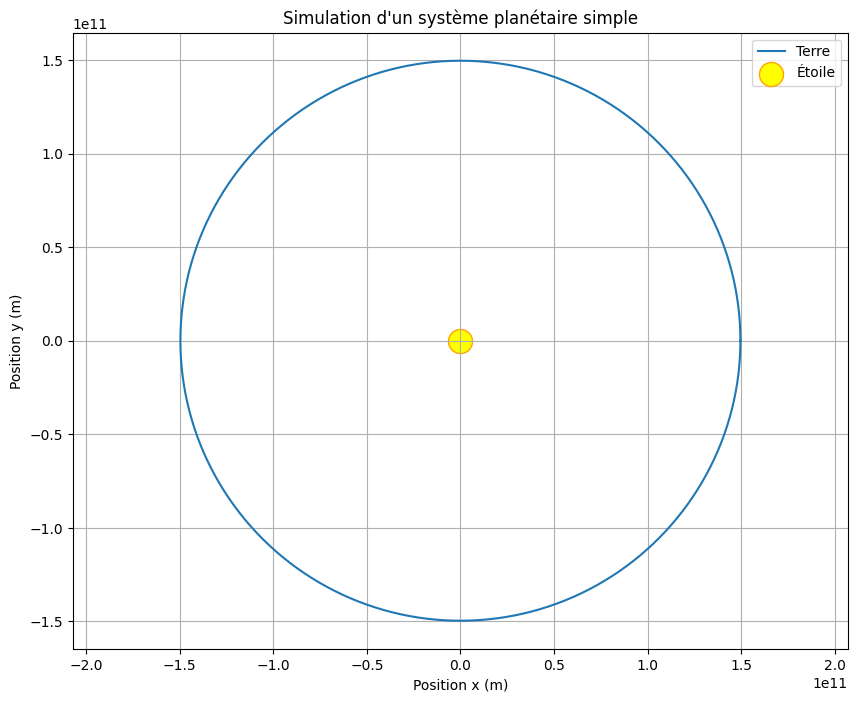

In [13]:
# --- Visualisation ---
plt.figure(figsize=(10, 8))

x = trajectoire[:, 0]
y = trajectoire[:, 1]

plt.plot(x, y, label=f"Terre")

# Position de l'étoile
plt.scatter(0, 0, color='yellow', edgecolors="orange", s=300, label="Étoile")

plt.xlabel("Position x (m)")
plt.ylabel("Position y (m)")
plt.title("Simulation d'un système planétaire simple")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

## **Exercice 4 - Visualiser la trajectoire orbitale avec `pygame`**

La fonction `play_orbit` ci-dessous permet de **visualiser de manière dynamique** la trajectoire de votre planète autour de votre étoile. En lisant la **documentation** de cette fonction, **modifiez** les dictionnaires `planete` et `etoile` pour qu'ils contiennent les nouvelles clés nécessaires, et **appelez** la fonction.


In [14]:
import pygame    
pygame.init()

/home/souverin/.local/share/mamba/envs/modnum/lib/python3.13/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.13.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


(5, 0)

In [15]:
def play_orbit(params, planete, etoile, dt=86400):
    """
    Simule et visualise dynamiquement l'orbite d'une planète autour d'une étoile avec Pygame.
    
    Cette fonction résout numériquement les équations différentielles du mouvement orbital
    à chaque pas de temps et affiche l'animation en temps réel. L'utilisateur peut zoomer
    avec la touche 'Z' et quitter avec la croix de fermeture.
    
    Parameters
    ----------
    params : list or array
        Conditions initiales du système : [x0, y0, vx0, vy0]
        - x0, y0 : position initiale de la planète (en mètres)
        - vx0, vy0 : vitesse initiale de la planète (en m/s)
    
    planete : dict
        Dictionnaire contenant les propriétés de la planète :
        - "name" : nom de la planète (str)
        - "position" : [x, y] position actuelle (list)
        - "vitesse" : [vx, vy] vitesse actuelle (list)
        - "color" : (R, G, B) couleur RGB pour l'affichage (tuple)
        - "apparent_size" : rayon en pixels pour le rendu (int)
    
    etoile : dict
        Dictionnaire contenant les propriétés de l'étoile :
        - "name" : nom de l'étoile (str)
        - "color" : (R, G, B) couleur RGB pour l'affichage (tuple)
        - "apparent_size" : rayon en pixels pour le rendu (int)
    
    dt : float, optional
        Pas de temps pour l'intégration numérique, en secondes. Par défaut : 86400 (1 jour).
        Augmenter pour une simulation plus rapide, diminuer pour plus de précision.
    
    Returns
    -------
    None
        Met à jour l'affichage Pygame jusqu'à ce que l'utilisateur ferme la fenêtre.
    """
    pygame.display.init()
    WIDTH, HEIGHT = 1200, 900
    SCALE = 2e-9      # facteur pour afficher en pixels

    screen = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Système 1 étoile - 1 planète")
    clock = pygame.time.Clock()

    planete["trail"] = []

    zoomed = False
    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            if event.type == pygame.KEYDOWN and event.key == pygame.K_z:
                zoomed = not zoomed
                planete["trail"].clear()

        # intégration d'un pas DT
        tspan = [0, dt]
        trajectoire = sp.integrate.odeint(equations_mouvement, params, tspan, args=(etoile,))
        params = trajectoire[-1]

        # mise à jour planète
        planete["position"][0] = params[0]
        planete["position"][1] = params[1]
        planete["vitesse"][0] = params[2]
        planete["vitesse"][1] = params[3]

        # affichage
        screen.fill((0, 0, 0))

        x, y = planete["position"]
        sx = int(x * SCALE + WIDTH/2)
        sy = int(y * SCALE + HEIGHT/2)

        planete["trail"].append((sx, sy))
        if len(planete["trail"]) > 200:
            planete["trail"].pop(0)
        if len(planete["trail"]) > 2:
            pygame.draw.lines(screen, planete["color"], False, planete["trail"], 1)

        pygame.draw.circle(screen, planete["color"], (sx, sy), planete["apparent_size"])
        # étoile au centre (fixe)
        pygame.draw.circle(screen, etoile["color"], (WIDTH//2, HEIGHT//2), etoile["apparent_size"])

        pygame.display.flip()
        clock.tick(60)

    pygame.display.quit()

In [18]:
#Dictionnaire de l'étoile
etoile = {
    "nom":"Soleil",
    "temperature":5772,
    "rayon":const.R_sun.value,
    "masse":const.M_sun.value,
    "color": (255, 255, 0), #(R, G, B) 
    "apparent_size": 10,
    }

#Dictionnaire de la planète
planete = {
    "name": "Terre",
    "masse": const.M_earth.value,
    "position": [const.au.value*10, 0.0],
    "vitesse": [0.0, np.sqrt(const.G.value * etoile["masse"] / const.au.value)],
    "color": (0, 100, 255), #(R, G, B) 
    "apparent_size": 5,
}

play_orbit(params, planete, etoile, dt=86400)

## **Exercice 5 - Sauvegarder vos dictionnaires**

1. Sauvegarder le dictionnaire contenant les caractéristiques de votre étoile dans un fichier texte au format JSON en utilisant la fonction **`json.dump()`**. 
Puis, chargez ce fichier avec la fonction **`json.load()`** et affichez les caractéristiques de votre étoile pour vérifier que la sauvegarde et le chargement se sont bien passés. Chargez ensuite le fichier avec la fonction **`json.load()`** et affichez les caractéristiques de votre étoile pour vérifier que la sauvegarde et le chargement se sont bien passés.

2. Faites de même pour le dictionnaire de votre planète.

**Lisez la documentation du module **`json`** pour comprendre comment utiliser ces fonctions (https://docs.python.org/3/library/json.html).**


In [17]:
# Sauvegarde du dictionnaire de l'étoile
import json
with open("etoile.json", "w") as f:
    json.dump(etoile, f)

# Chargement du dictionnaire de l'étoile
with open("etoile.json", "r") as f:
    etoile_chargee = json.load(f)

# Affichage du dictionnaire chargé
print(etoile_chargee)

# Sauvegarde du dictionnaire de la planète
with open("planete.json", "w") as f:
    json.dump(planete, f)

# Chargement du dictionnaire de la planète
with open("planete.json", "r") as f:
    planete_chargee = json.load(f)

# Affichage du dictionnaire chargé
print(planete_chargee)

{'nom': 'Soleil', 'temperature': 5772, 'rayon': 695700000.0, 'masse': 1.988409870698051e+30, 'color': [255, 255, 0], 'apparent_size': 10}
{'name': 'Terre', 'masse': 5.972167867791379e+24, 'position': [40475765133.283424, 144019162815.54425], 'vitesse': [-28673.696435908772, 8058.668764361825], 'color': [0, 100, 255], 'apparent_size': 5, 'trail': [[442, 195], [446, 193], [451, 190], [455, 188], [460, 185], [464, 183], [469, 180], [473, 178], [478, 176], [483, 174], [488, 172], [492, 170], [497, 168], [502, 167], [507, 165], [512, 163], [517, 162], [522, 161], [527, 159], [532, 158], [537, 157], [542, 156], [547, 155], [552, 154], [557, 153], [562, 153], [567, 152], [572, 152], [577, 151], [583, 151], [588, 151], [593, 150], [598, 150], [603, 150], [608, 150], [613, 151], [619, 151], [624, 151], [629, 152], [634, 152], [639, 153], [644, 154], [649, 154], [654, 155], [659, 156], [664, 157], [669, 159], [674, 160], [679, 161], [684, 163], [689, 164], [694, 166], [699, 167], [704, 169], [70